#### Objective: Revenue Optimization

1. Data Cleaning

• New Column
Gross Revenue: [ [(Quantity * Average Price)*(1-Discount Rate in %  {only "Used" is adopted} ) ] + Delivery Charge ]  * (1+ GST in %)
    Note: Delivery Charge is paid by customer and taxable ; assume delivery charge is equal to its cost, breakeven

• Explore Outliers
if quantity is material, create a separately group to accommodate for further investigation afterwards / or other actions…


2. Analysis
• Gross revenue 
by time-series, product category, location, gender, specific customer id, tenure months , specific coupon type -- (** --> gender, product category  )
    
• Product
by quantity , by gender, time-series
    
• Coupon status (used / clicked / not used) -> gender
Reasons for clicked coupon: Requirements of coupon (sum, expiry date…)
    
• Loyality (tenure month) 
--> customer id, gender, location, 
--> count no. of new customers coming over time : by counting tenure months / (not recommended: Max. no of customer ID) at that end of month  


3. Limitation
• lack cost information to calculate net revenue column
• offline and online spending determination


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

C:\Users\leung\AppData\Local\Temp\ipykernel_15608\265156068.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data["Discount_pct"].fillna(0, inplace = True)
c:\Users\leung\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


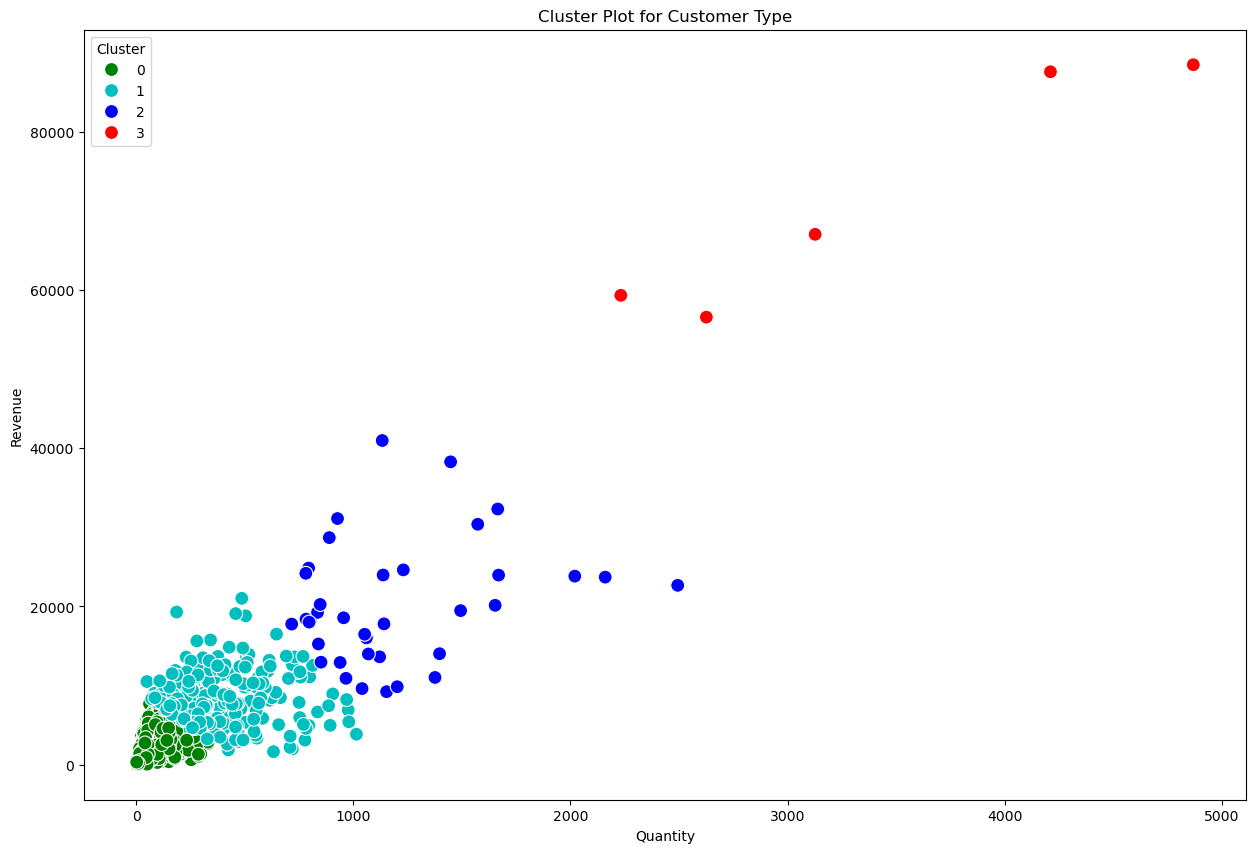

       Transaction_ID  Distinct_CustomerID_Count
6844            25950                          8
13656           34313                          8
16869           38186                          6
4998            23520                          6
9097            28715                          6
       Transaction_ID  Distinct_Transaction_Date_Count
0               16679                                1
16692           37972                                1
16714           37996                                1
16713           37995                                1
16712           37994                                1
    Transaction_Date  Distinct_Transaction_ID_Count
330       2019-11-27                            206
351       2019-12-18                            164
352       2019-12-19                            136
344       2019-12-11                            133
338       2019-12-05                            132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries,

In [245]:
%run Project_1_EDA_Group_2_Idea_4.data_preparation.ipynb

Note: Offline_Spend and Online_Spend are the cumulative spending of the customer on that particular date. They are irrelevant to the transaction of that row. 

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import calendar
mon=list(calendar.month_name)[1:]

from matplotlib import cm
c1=cm.get_cmap('Accent')

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15, 10] #default figure size

C:\Users\leung\AppData\Local\Temp\ipykernel_15608\1075995019.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c1=cm.get_cmap('Accent')


In [247]:
sales_data.head()

,index,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Coupon_Status,GST,Date,Month,Coupon_Code,Discount_pct,Transaction_Weekday,TotalPrice,Purchase_ID,Customer_Type
0,0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,Used,0.1,1/1/2019,1,ELEC10,10.0,2,159.32,16679_17850,Normal
1,1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,Used,0.1,1/1/2019,1,ELEC10,10.0,2,159.32,16680_17850,Normal
2,2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,Not Used,0.1,1/1/2019,1,ELEC10,10.0,2,277.24,16696_17850,Normal
3,3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,Clicked,0.1,1/1/2019,1,ELEC10,10.0,2,96.80,16699_17850,Normal
4,4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,Clicked,0.1,1/1/2019,1,ELEC10,10.0,2,176.23,16700_17850,Normal


In [248]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                52924 non-null  int64         
 1   CustomerID           52924 non-null  int32         
 2   Gender               52924 non-null  object        
 3   Location             52924 non-null  object        
 4   Tenure_Months        52924 non-null  int32         
 5   Transaction_ID       52924 non-null  int32         
 6   Transaction_Date     52924 non-null  datetime64[ns]
 7   Product_SKU          52924 non-null  object        
 8   Product_Description  52924 non-null  object        
 9   Product_Category     52924 non-null  object        
 10  Quantity             52924 non-null  float64       
 11  Avg_Price            52924 non-null  float64       
 12  Delivery_Charges     52924 non-null  float64       
 13  Coupon_Status        52924 non-

**`Gross Revenue`**

* Total Revenue by month

C:\Users\leung\AppData\Local\Temp\ipykernel_15608\709660681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sum_revenue, x=sum_revenue.index, y='TotalPrice', palette='crest')


Text(0.5, 1.0, 'Total Revenue by Month')

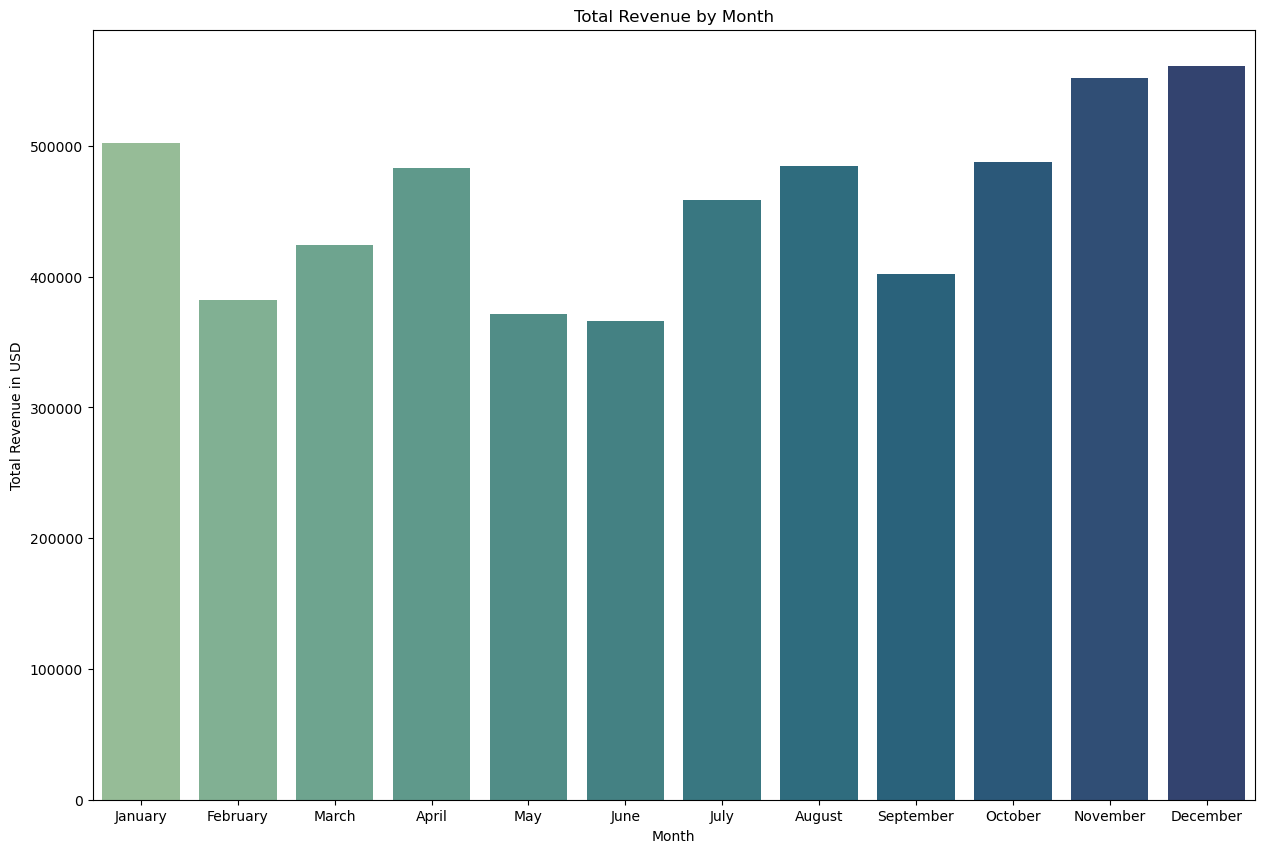

In [249]:
# Total Revenue by Month
sum_revenue = sales_data[['TotalPrice', 'Month']].groupby('Month').sum()
sns.barplot(data=sum_revenue, x=sum_revenue.index, y='TotalPrice', palette='crest')
plt.xticks(range(12), mon, rotation=0)
plt.ylabel("Total Revenue in USD")
plt.title("Total Revenue by Month")


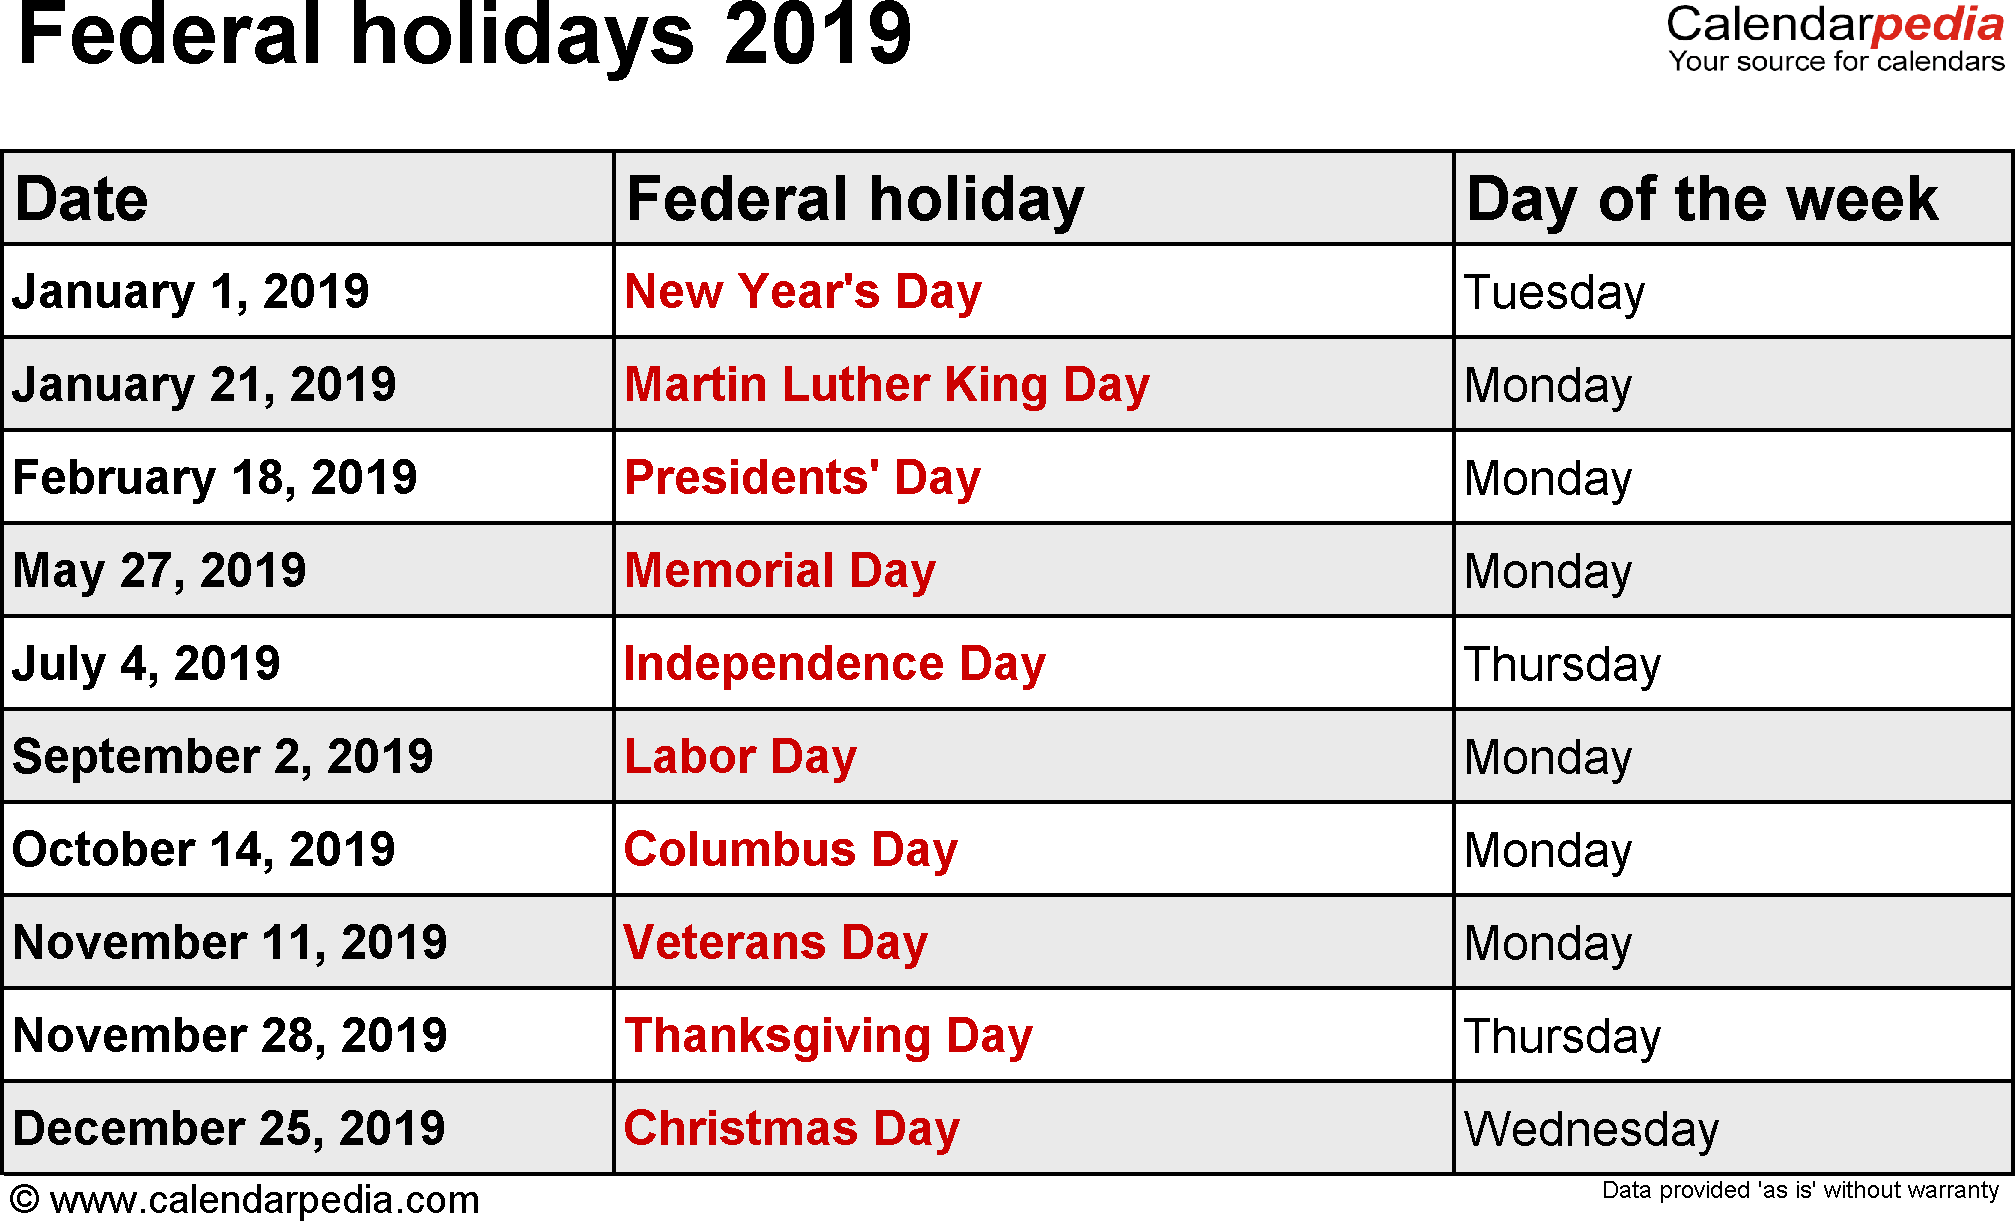
https://www.calendarpedia.com/holidays/federal-holidays-2019.html

Higher Demand at the Start and End of the Year --> Seasonal Demand: Holiday

**`Product Categories`**

* Total Revenue by product category and gender

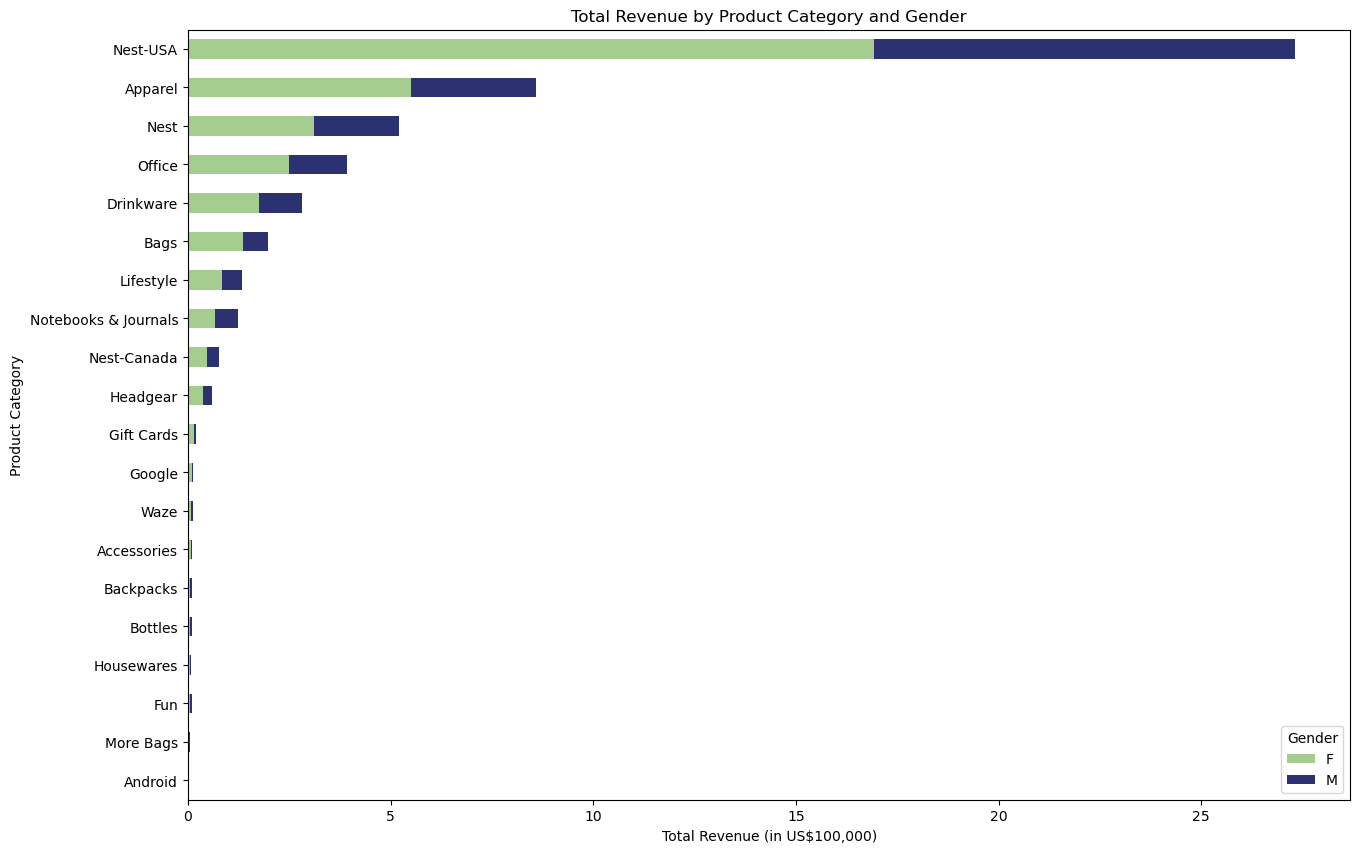

In [250]:
# Aggregate data by Product_Category and Gender, then calculate total revenue
product_revenue_gender = sales_data.groupby(['Product_Category', 'Gender'])['TotalPrice'].sum().unstack().fillna(0)
product_revenue_gender = product_revenue_gender / 100000  # Adjust x-axis units to 100,000

# Sort the data in descending order by total revenue for better visualization
product_revenue_gender = product_revenue_gender.sort_values(by='F', ascending=True)
product_revenue_gender.plot(kind='barh', stacked=True, colormap='crest')
plt.xlabel("Total Revenue (in US$100,000)")
plt.ylabel("Product Category")
plt.title("Total Revenue by Product Category and Gender")
plt.legend(title="Gender", loc='lower right')

1. Top 3 and Worst 3 Product Categories

    * Nest-USA , Nest, Apparel categories contribute the top 3 revenue amount among all categories. Worth emphasis.
    * Fun, More Bags, Andriod categories contribute the least. Might have to strictly control our inventory planning of these products.

2. Female customers > Male customers in total and in most of the product categories

Let's break down top 3 product categories to check their respective product sales performance. 

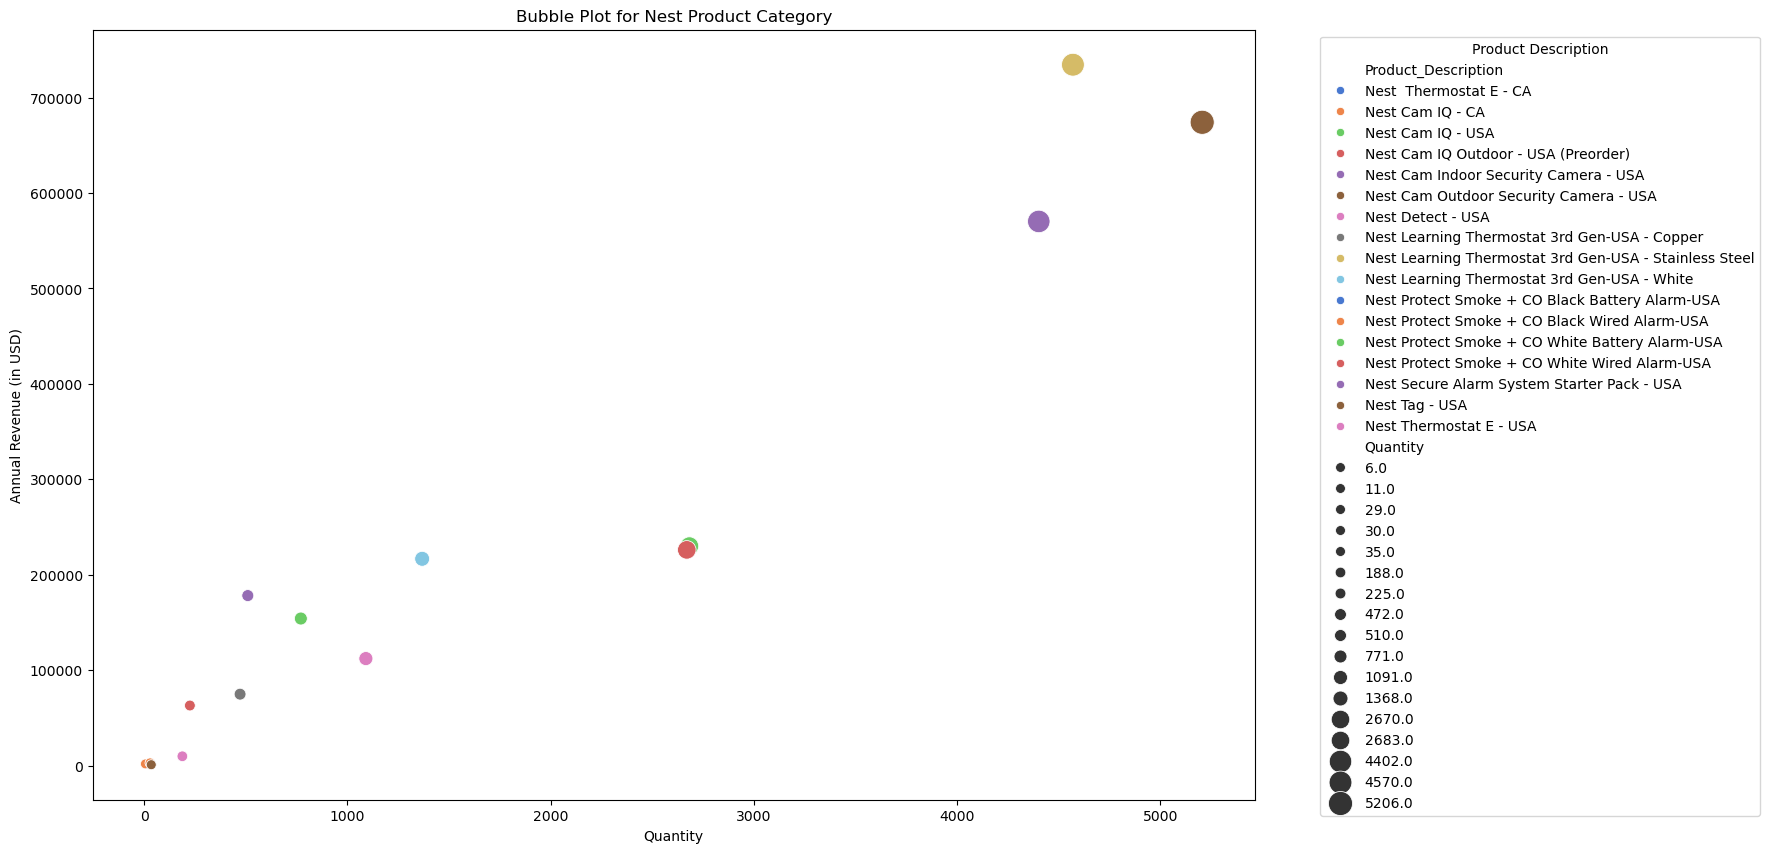

In [251]:
nest_usa_data = sales_data[sales_data['Product_Category'].isin(['Nest-USA', 'Nest'])]
nest_usa_data = nest_usa_data[['TotalPrice', 'Quantity','Product_Description']]
nest_usa_data = nest_usa_data.groupby('Product_Description').sum()

# Create a bubble plot for Nest-USA data
scatter = sns.scatterplot(
    data=nest_usa_data,
    x='Quantity',
    y='TotalPrice',
    size='Quantity',
    hue=nest_usa_data.index,
    sizes=(50, 300),
    palette='muted',
    legend='full'
)

# Customize the plot
plt.xlabel("Quantity")
plt.ylabel("Annual Revenue (in USD)")
plt.title("Bubble Plot for Nest Product Category")
plt.legend(title="Product Description", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Nest Products: 
    
Key Popular products are Security Camera, Learning Thermostat, Cam IQ.

* Security Camera : Both Outdoor and Indoor had high demand, but Outdoor's demand was higher
* Thermostat : Stainless Steel  >  better than all the other learning thermostat and thermostat.
* Camera : USA / CA version are roughly the same.

--> understanding these best-selling information could booast our sales via selecting them in our product marketing or recommendation in a face-to-face scenario. 

For Apparel Product Category, there are more than 200 row (i.e. 200 categories).
It is hard to observe each cateogry manually, thus cluster plot is used to find the appropriate cluster and practice for this product category.

In [252]:
# to show the number of categories for Apparel
apparel_data = sales_data[ sales_data['Product_Category'] == 'Apparel' ]
apparel_data = apparel_data[['TotalPrice', 'Quantity','Product_Description']]
apparel_data = apparel_data.groupby('Product_Description').sum()
apparel_data.shape

(211, 2)

c:\Users\leung\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


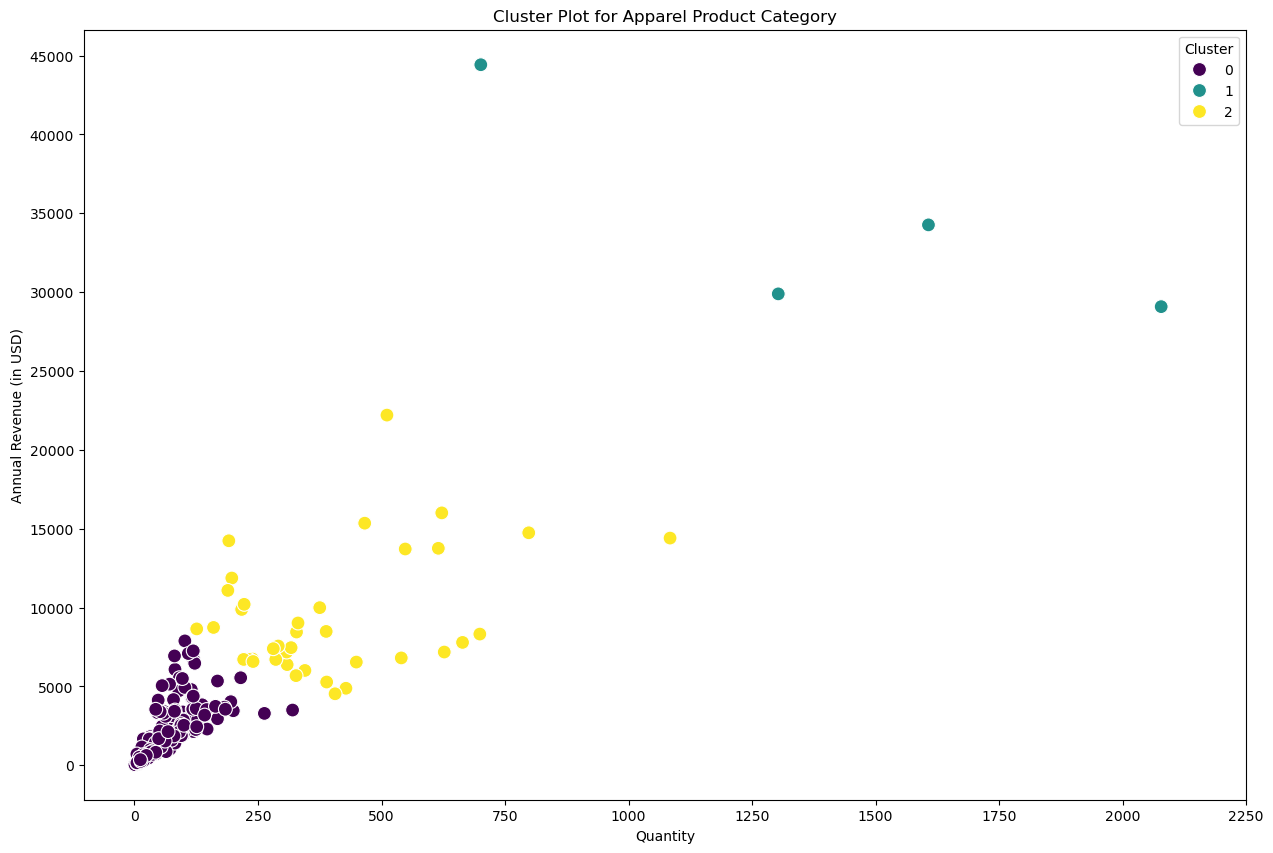

In [253]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

nest_usa_data = sales_data[ sales_data['Product_Category'] == 'Apparel' ]
nest_usa_data = nest_usa_data[['TotalPrice', 'Quantity','Product_Description']]
nest_usa_data = nest_usa_data.groupby('Product_Description').sum()
nest_usa_data

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nest_usa_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
nest_usa_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Create a scatter plot for clusters
sns.scatterplot(
    data=nest_usa_data,
    x='Quantity',
    y='TotalPrice',
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.title("Cluster Plot for Apparel Product Category")
plt.xlabel("Quantity")
plt.xticks(ticks=range(0, 2500, 250))
plt.ylabel("Annual Revenue (in USD)")
plt.yticks(ticks=range(0, 50000, 5000))
plt.legend(title="Cluster")
plt.show()



We can divide the Apparel category into 3 groups
1. Those in purple 0  ( quantity <250 ) and ( Annual Revnue < 6000 )
2. in Yellow 2    ( 250 < quantity < 1250 ) amd (6000 < Annual Revenue < 2500)
3. Rest in navy 1 that is scattered (bulk quantity and revenue from 30000 - 45000)

In order to maximize revenue of the business
* Business focus (i.e. Marketing & Inventory Planning ) on group 1 & 2 should be equally important beacuase although group 2 has more number of categories and its aggregated outcome is similar to group 1 indeed.
* In all groups, those points with higher annual revenue in the same x-axis should be emphasized. It is because they generate higher revenue with same quantity sold.


**`Customer Segments`**

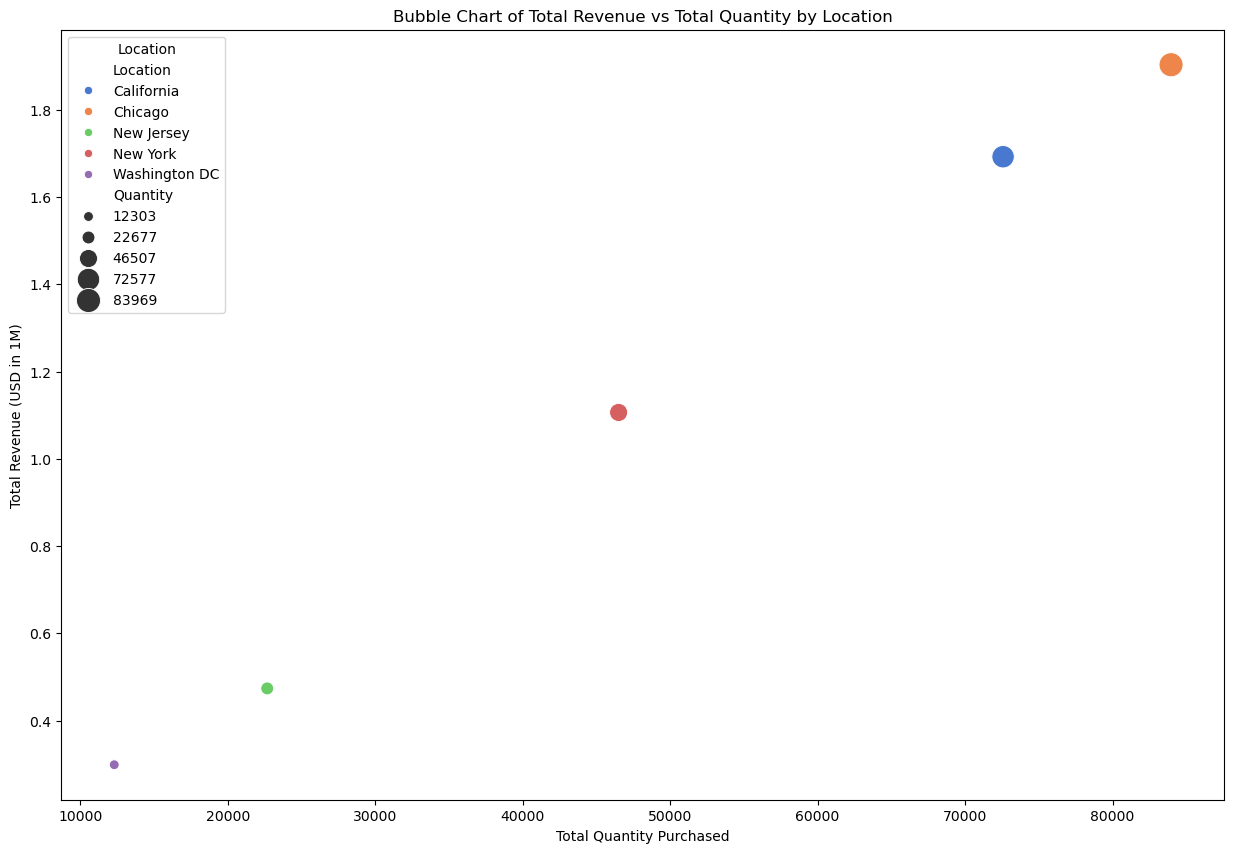

In [254]:
# Aggregate data by Location and calculate total revenue and quantity
location_quantity_revenue = sales_data.groupby('Location')[['TotalPrice', 'Quantity']].sum()
location_quantity_revenue['TotalPrice'] = location_quantity_revenue['TotalPrice'] / 1000000

location_quantity_revenue['Quantity'] = location_quantity_revenue['Quantity'].astype(int)
sns.scatterplot(data=location_quantity_revenue, x='Quantity', y='TotalPrice', size='Quantity', hue=location_quantity_revenue.index, sizes=(50,300), palette='muted', legend='full')
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Revenue (USD in 1M)")
plt.title("Bubble Chart of Total Revenue vs Total Quantity by Location")
plt.legend(title="Location")

Text(0.5, 1.0, 'Linear Regression: Total Revenue vs Total Quantity')

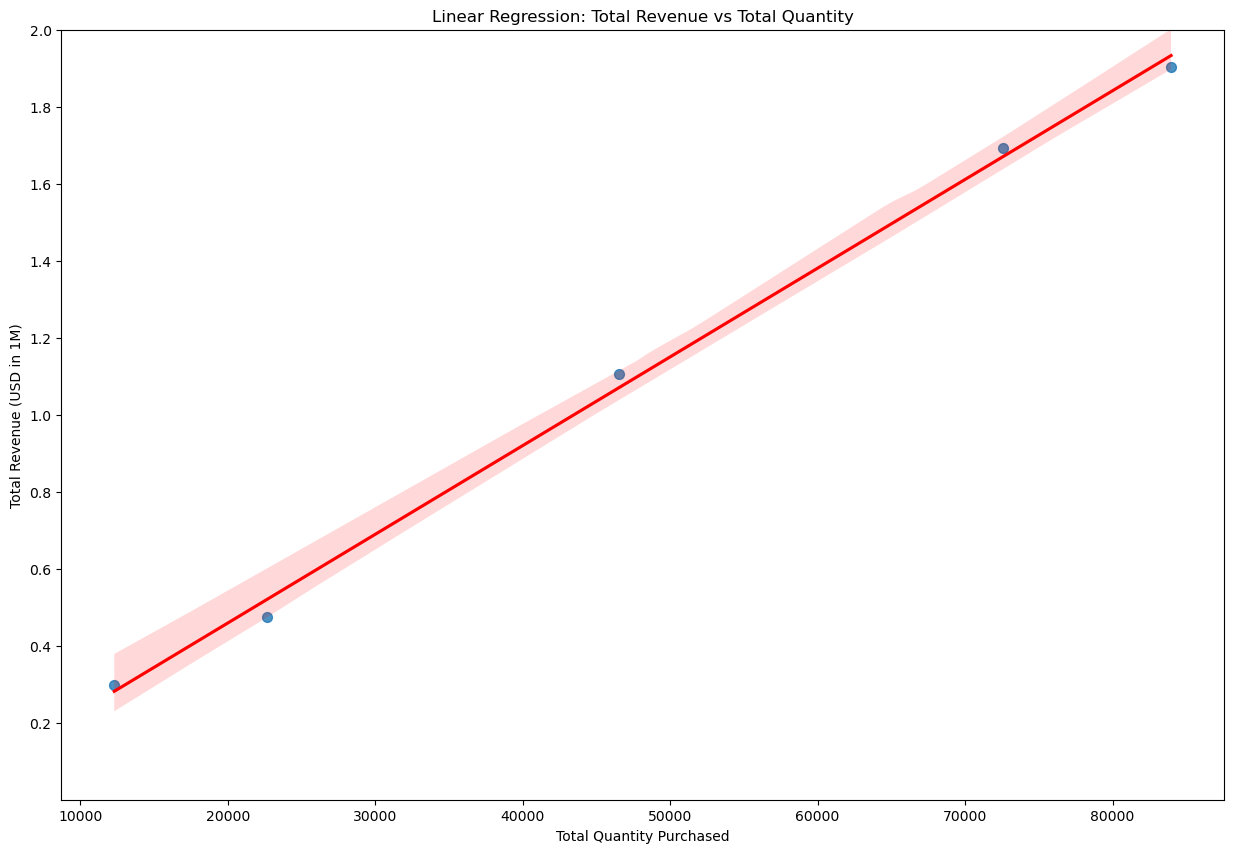

In [255]:
# Plot a linear regression graph for Total Revenue vs Total Quantity
regplot = sns.regplot(data=location_quantity_revenue, x='Quantity', y='TotalPrice', scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Revenue (USD in 1M)")
plt.ylim(0, 2)  # Adjust the upper limit to match the scale of the bubble chart
regplot.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2])    # Adjust the scale of y-axis of the bubble chart
plt.title("Linear Regression: Total Revenue vs Total Quantity")


1. Revenue by Customer Location: Chicago > California > New York > New Jersey > Washington DC
2. Positive correlation between total quantity purchased and total revenue.
    
    Revenue = Total Quantity x Average Price (Roughly)
    It is observed when the total quantity increases, the average price purchased by customer doesn't decrease due to Economies of Scale for the current stage of the business. In ideal situation, the increase in quantity together with a decrease in purchase price should come with a higher total total revenue. Otherwise, it doesn't make sense for a company to offer bulk quantity with a lower per unit price. (i.e. the curve should tend to less steeper in slope as quantity increases). It could possibly implies that the business scale hasn't reached its maximum, and the portfolio mix of products bought by each location are roughly the same. 
    
    However, the number of locations in the US where customer brought our products from are just 5. The No. of observations might not be confident enough to form a comprehension prediction to other locations in the US based on the estimated quantity purchased by customers in case a business is running there.

* Top 10 Customer

Text(0.5, 1.0, 'Top 10 Customers by Annual Revenue')

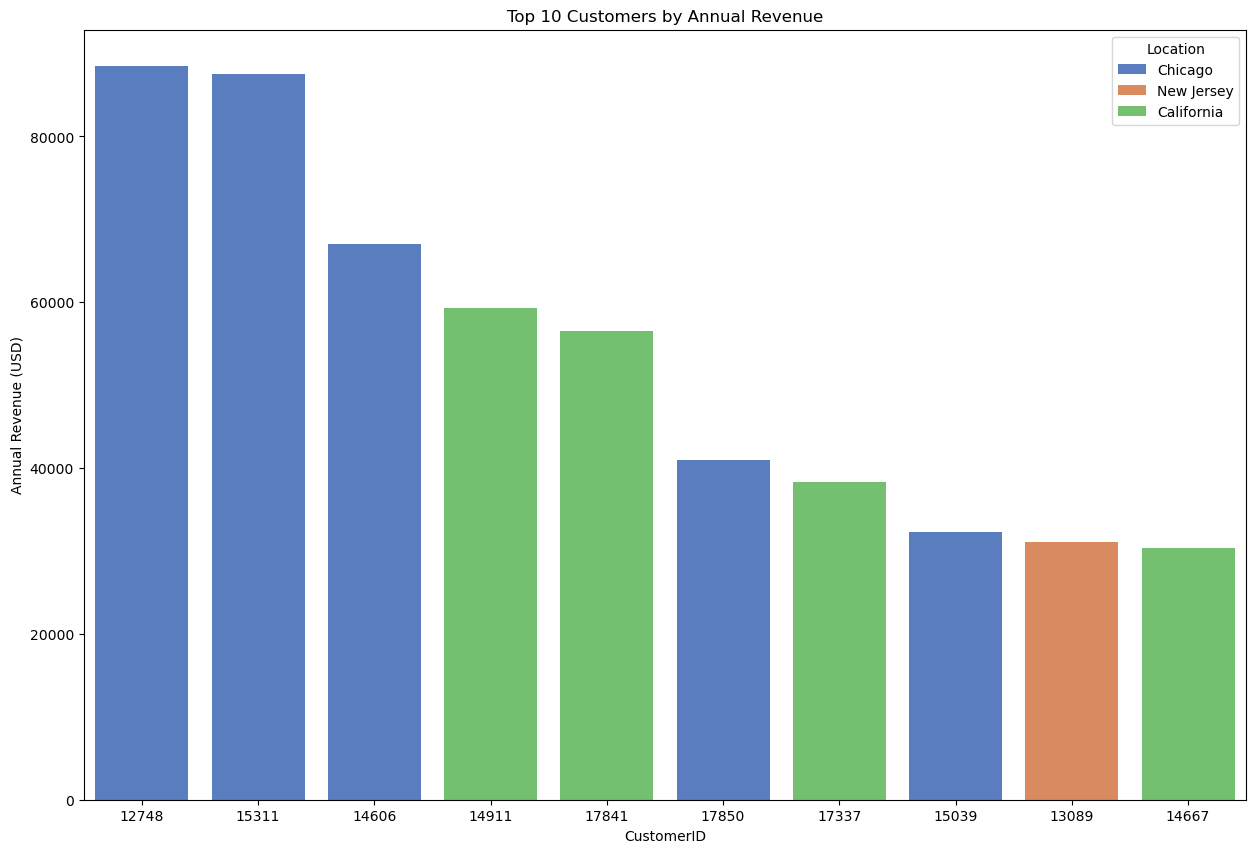

In [256]:
# Sort the data by TotalPrice in descending order
topID_revenue = sales_data[['CustomerID', 'TotalPrice', 'Location']].groupby(['CustomerID', 'Location']).sum().reset_index()
topID_revenue = topID_revenue.sort_values(by='TotalPrice', ascending=False).head(10)

# Sort the DataFrame by 'TotalPrice' and extract the sorted 'CustomerID' values
sorted_customer_ids = topID_revenue.sort_values(by='TotalPrice', ascending=False)['CustomerID']

# Pass the sorted 'CustomerID' values to the 'order' parameter
sns.barplot(data=topID_revenue, x='CustomerID', y='TotalPrice', hue='Location', palette='muted', order=sorted_customer_ids)
plt.ylabel("Annual Revenue (USD)")
plt.title("Top 10 Customers by Annual Revenue")

1. Majority of Top 10 customers come from Chicago and California, which is similar to the descedning order of location total revenue.

    These customers should be treated with priority and superior services.

2. Another spotlight is customer 13089 from New Jersey

    New Jersey wass ranked fourth in the location revenue, but this customer outperformed customers from the 3rd location.
    This customer accounts for 5% of the total revenue of New Jersey

**`Tenure Study (Customer Loyalty)`**

* Total Revenue by Tenure (in Year)

In [257]:
sales_data['Tenure_Years'] = (sales_data['Tenure_Months'] / 6).round() * 0.5

tenure_revenue = sales_data[ ['TotalPrice','Tenure_Years','Gender'] ].groupby('Tenure_Years').sum()
tenure_revenue = sales_data[['TotalPrice', 'Tenure_Years', 'Gender']].groupby(['Tenure_Years', 'Gender']).sum().reset_index()
tenure_revenue

,Tenure_Years,Gender,TotalPrice
0,0.0,F,90868.66
1,0.0,M,32325.70
2,0.5,F,417407.72
3,0.5,M,202775.45
4,1.0,F,406827.84
5,1.0,M,265638.26
6,1.5,F,344426.96
7,1.5,M,175445.97
8,2.0,F,469302.26
9,2.0,M,372147.75


Text(0.5, 1.0, 'Total Revenue by Tenure')

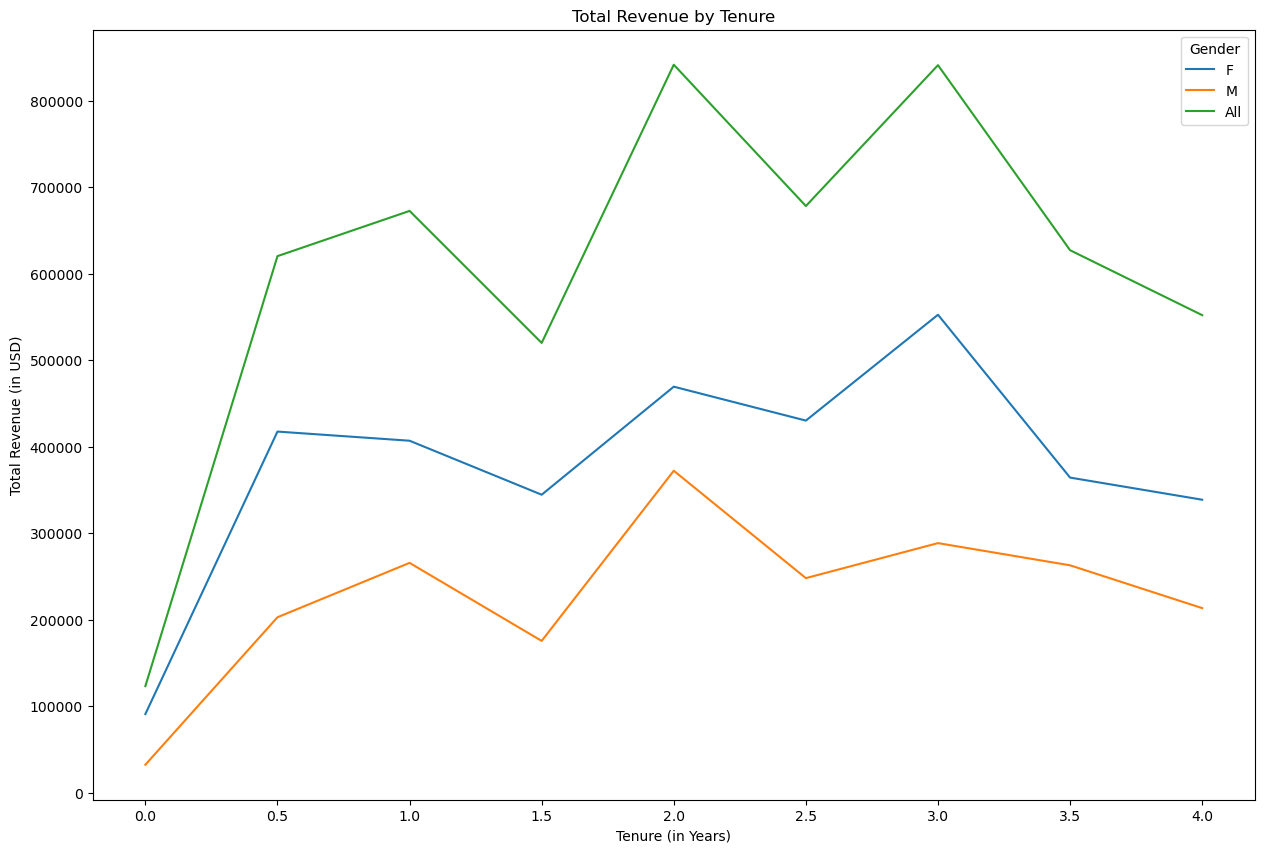

In [258]:
# Round 'Tenure_Years' to the nearest half-year
sales_data['Tenure_Years'] = (sales_data['Tenure_Months'] / 6).round() * 0.5

# Calculate total revenue for all genders combined
total_revenue_by_tenure = sales_data[['TotalPrice', 'Tenure_Years']].groupby('Tenure_Years').sum().reset_index()
total_revenue_by_tenure['Gender'] = 'All'

# Append the total revenue data to the original tenure_revenue DataFrame
tenure_revenue = pd.concat([tenure_revenue, total_revenue_by_tenure], ignore_index=True)
tenure_revenue

sns.lineplot(data = tenure_revenue, y='TotalPrice',x='Tenure_Years',color=c1(0.5), hue= 'Gender')
plt.xlabel("Tenure (in Years)")
plt.ylabel("Total Revenue (in USD)")
plt.title("Total Revenue by Tenure")

Generally, higher tenure, higher total revenue. 
The meausre is especially material for every 1 year increment.  (e.g. Year 0 < Year 1 < Year 2 ...)

However, this dataset only contains 1 year of data. Even though:
1. there are spikes for gender Female / Male over time
2. there are downturns in year 4 for all genders

it is hard to determine they are recurring phenomenon. They could be one-off.

All in all, it is more confident to say that customer loyalty in terms of tenure is generally significant to total revenue.

* Transaction Range by Tenure (in Year)

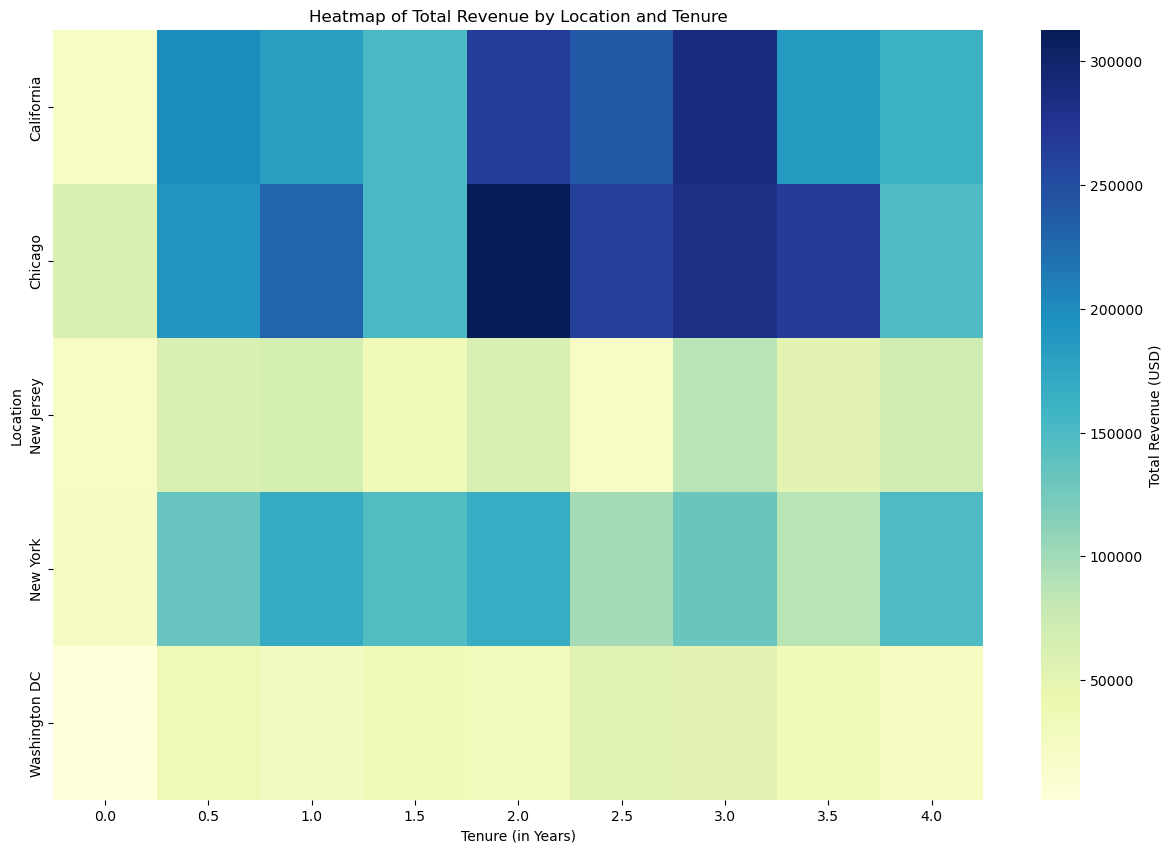

In [259]:
# Round 'Tenure_Years' to the nearest half-year
sales_data['Tenure_Years'] = (sales_data['Tenure_Months'] / 6).round() * 0.5

# Create a pivot table for the heatmap
heatmap_data = sales_data.pivot_table(index='Location', columns='Tenure_Years', values='TotalPrice', aggfunc='sum', fill_value=0)

# Plot the heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Total Revenue (USD)'})
plt.title("Heatmap of Total Revenue by Location and Tenure")
plt.xlabel("Tenure (in Years)")
plt.ylabel("Location")
plt.show()

The effect of "higher tenure, higher total revenue" is relatively obvious in the location (Chicago , California , New York)

whereas New Jersey and Washingont DC are less obvious. It could be due to different service treatments to different locations.

Since customer loyalty is important to total revenue, company has to find ways to improve in these two locations, e.g. incentive / campagin.

C:\Users\leung\AppData\Local\Temp\ipykernel_15608\2033698077.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= tenure_revenue, x='Tenure_Years', y='TotalPrice', palette='crest')


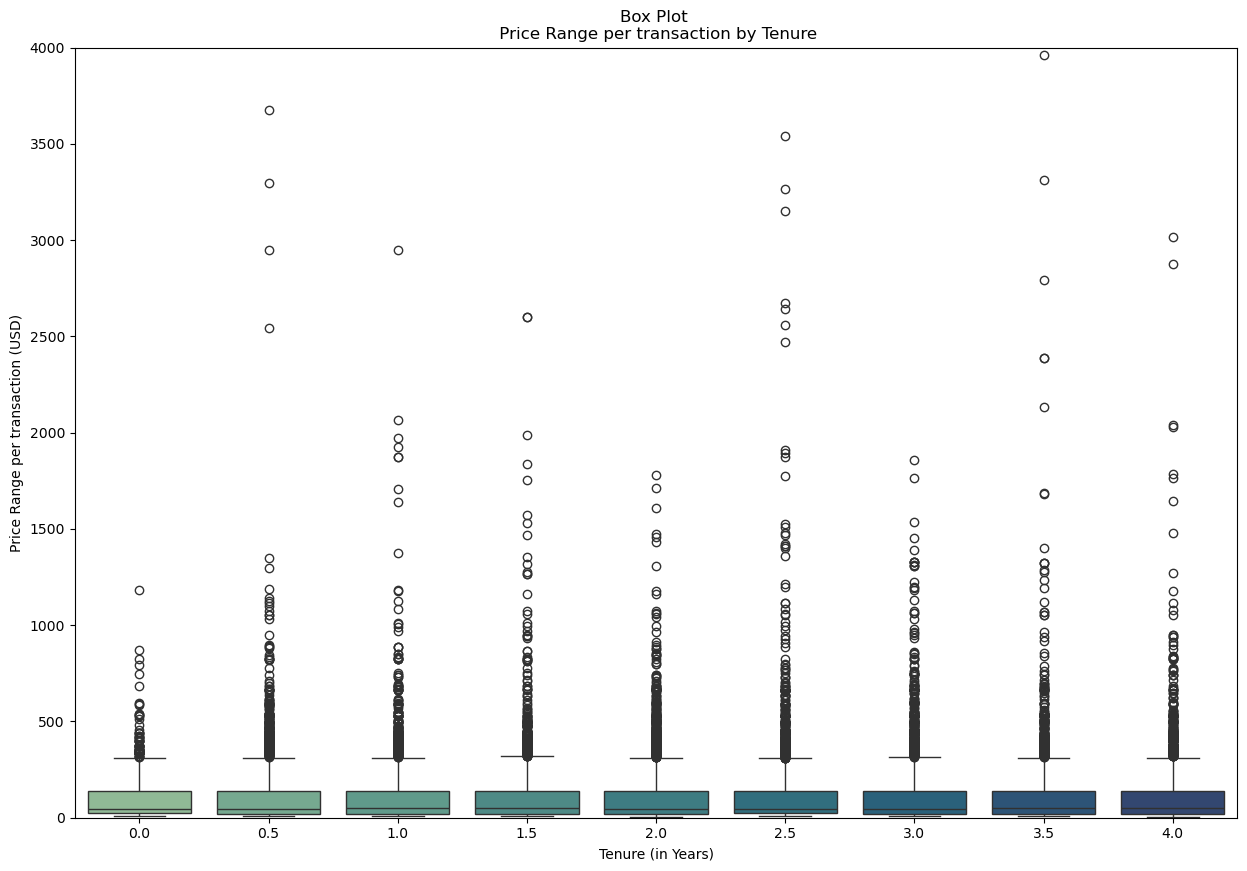

In [260]:
# Round 'Tenure_Years' to the nearest half-year
sales_data['Tenure_Years'] = (sales_data['Tenure_Months'] / 6).round() * 0.5

tenure_revenue = sales_data[ ['TotalPrice','Tenure_Years'] ]

sns.boxplot(data= tenure_revenue, x='Tenure_Years', y='TotalPrice', palette='crest')
plt.xlabel("Tenure (in Years)")
plt.ylim(0, 4000)
plt.ylabel("Price Range per transaction (USD)")
plt.title("Box Plot \n Price Range per transaction by Tenure")
plt.show()

The Price Range per transaction is almost the same in majority of the situation across customer with tenure years between less than 1 year to 4 years.
However, it is observed that the upside deviation increases obviously since tenure years has reached 1 compared to those below 1 year.
It is believed that customer loyalty is impactful. Customer with higher tensure years typically tend to be more geneous and consume more when demand is special. It could be like e.g. personal reason,for holiday celebration.

**`Coupon Study (Customer Incentive)`**

Coupon Status over time

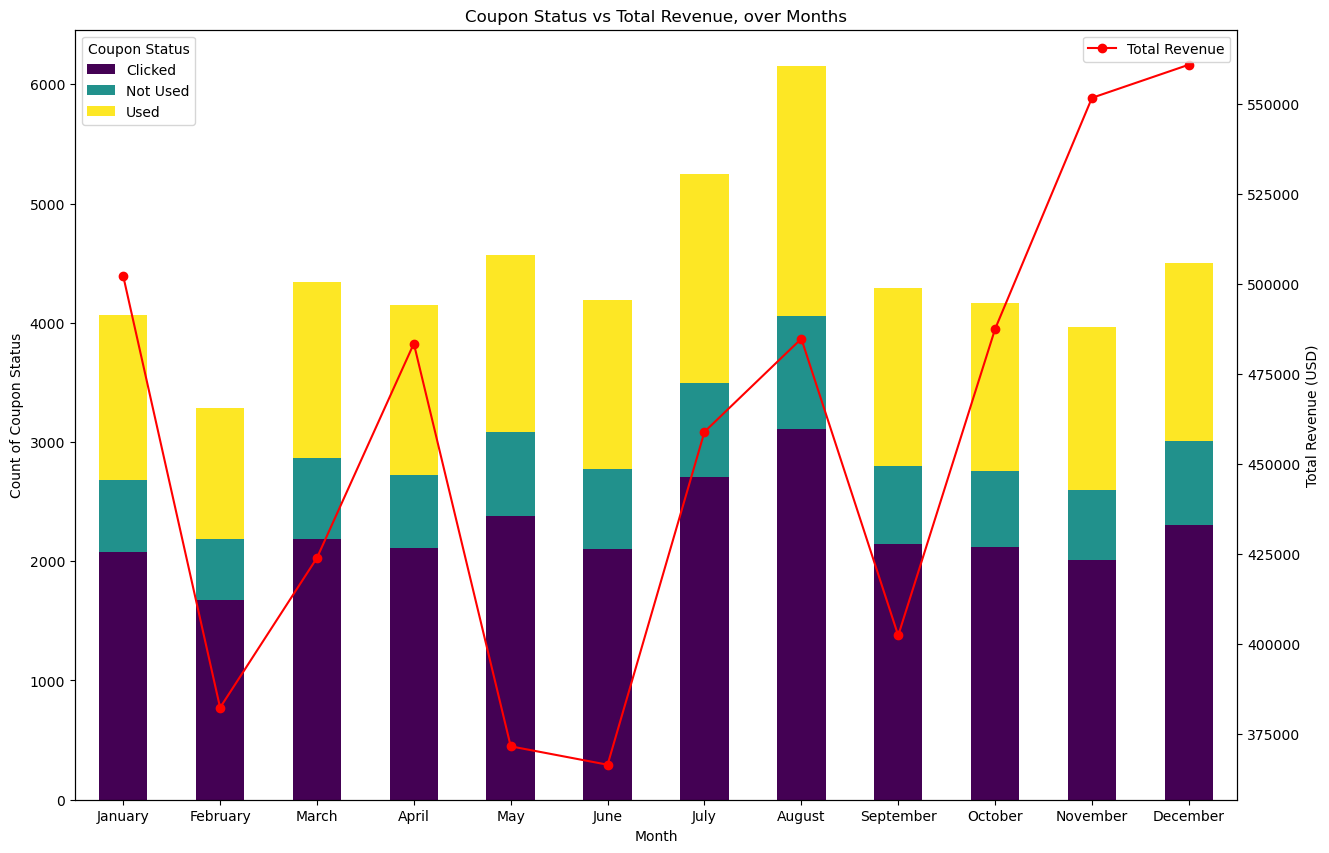

In [261]:
# Group data by Month and Coupon_Status, then count the occurrences
coupon_status_month = sales_data.groupby(['Month', 'Coupon_Status']).size().unstack(fill_value=0)

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the stacked bar chart for coupon statuses
coupon_status_month.plot(kind='bar', stacked=True, colormap='viridis', ax=ax1)
ax1.set_xlabel("Month")
ax1.set_ylabel("Count of Coupon Status")
ax1.set_title("Coupon Status vs Total Revenue, over Months")
ax1.set_xticks(range(12))
ax1.set_xticklabels(mon, rotation=0)
ax1.legend(title="Coupon Status", loc='upper left')

# Create a secondary y-axis for TotalPrice
ax2 = ax1.twinx()
ax2.plot(mon, total_price_by_month, color='red', marker='o', label='Total Revenue')
ax2.set_ylabel("Total Revenue (USD)")
ax2.legend(loc='upper right')

plt.show()

The distribution of coupons (including all kinds of its status) is almost the same across the whole year, except February, July and August.

* As mentioned at the beginning of this presentation, due to seasonal factor like holiday, there is Higher Demand at the Start and End of the Year.
And now, we further observe Q2 & Q3 solely. While Q2 and Q3 generally stay at a relatively lower annual revenue level compared to Q1 & Q4, the increase in use of coupon in July and August could actually boost revenue. (i.e. Jul and Aug revenue are around the highest level among Q2 and Q3).
Also, the decrease in use of coupon in February also came with a lower revenue in Q1.
It is confident that coupon incentive plays a vital role in boosting revenue.

* On the other hand, with our assumption that there is higher demand in Q1 & Q4 of the year, it is also observed the total amount of coupons in each individual month (total of all kinds of status) remain roughly the same as in months of other quarters. Since it is confident that coupon incentive could boost revenue, it is believed that there is room for improvement in issuing more appropriate coupon incentive in Q1 & Q4 to boost more revenue. 


Coupon Code Effectiveness Study 

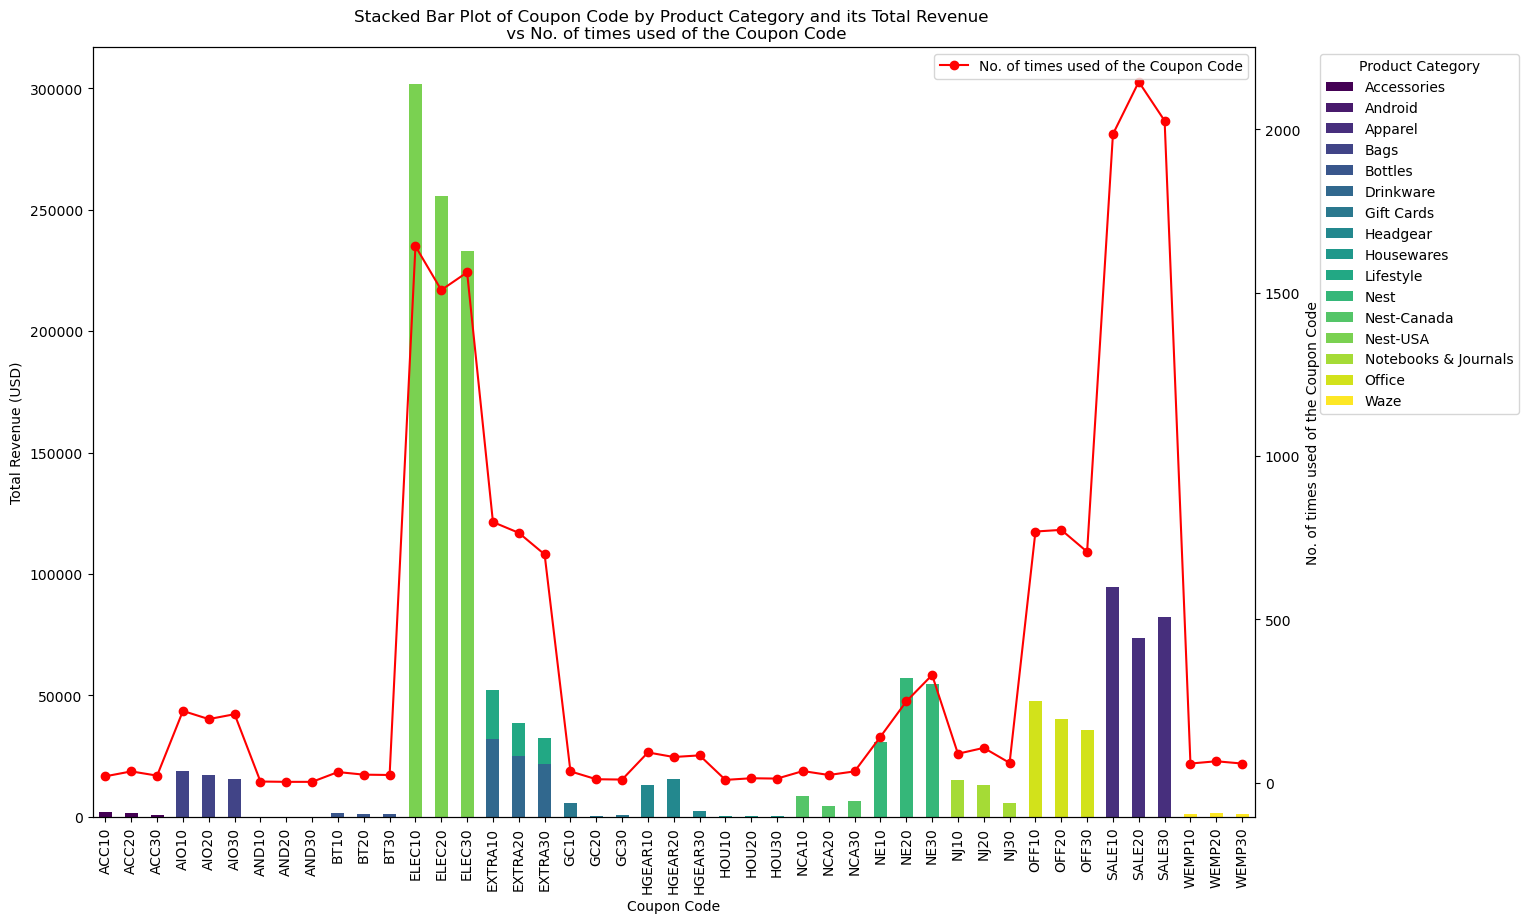

In [275]:
used_coupon = sales_data[sales_data['Coupon_Status'] == 'Used']
used_coupon2 = used_coupon[ ['Product_Category', 'TotalPrice', 'Coupon_Code' ] ]  
used_coupon2 = used_coupon2.groupby( ['Coupon_Code', 'Product_Category'] ).sum()
used_coupon2
# Create a pivot table for the stacked bar plot
used_coupon_pivot = used_coupon2.reset_index().pivot(index='Coupon_Code', columns='Product_Category', values='TotalPrice').fillna(0)

# Plot the stacked bar plot
fig, ax1 = plt.subplots(figsize=(15, 10))
used_coupon_pivot.plot(kind='bar', stacked=True, colormap='viridis', ax=ax1)
ax1.set_xlabel("Coupon Code")
ax1.set_ylabel("Total Revenue (USD)")
ax1.set_title("Stacked Bar Plot of Coupon Code by Product Category and its Total Revenue \n vs No. of times used of the Coupon Code")
ax1.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a secondary y-axis for the count of coupon codes
coupon_code_counts = used_coupon.groupby('Coupon_Code').size()
ax2 = ax1.twinx()
ax2.plot(coupon_code_counts.index, coupon_code_counts.values, color='red', marker='o', label='No. of times used of the Coupon Code')
ax2.set_ylabel("No. of times used of the Coupon Code")
ax2.legend(loc='upper right')

plt.show()


The most effective Coupon Code (most used and noteable revenue)
1. ELEC 10 to ELEC 30 : mainly used for Nest Electrical Products
2. SALE 10 to SALE 30 : used for a wide spectrum of products offered by the business (mainly Accessories, Andriod, Apparel), it is for general usage purpose

It is believed that by issuing more similar coupon code covering these products and together with similar terms in the coupon code could help to boost revenue.

To cross-check, stack bar chart by each individual product for further reference

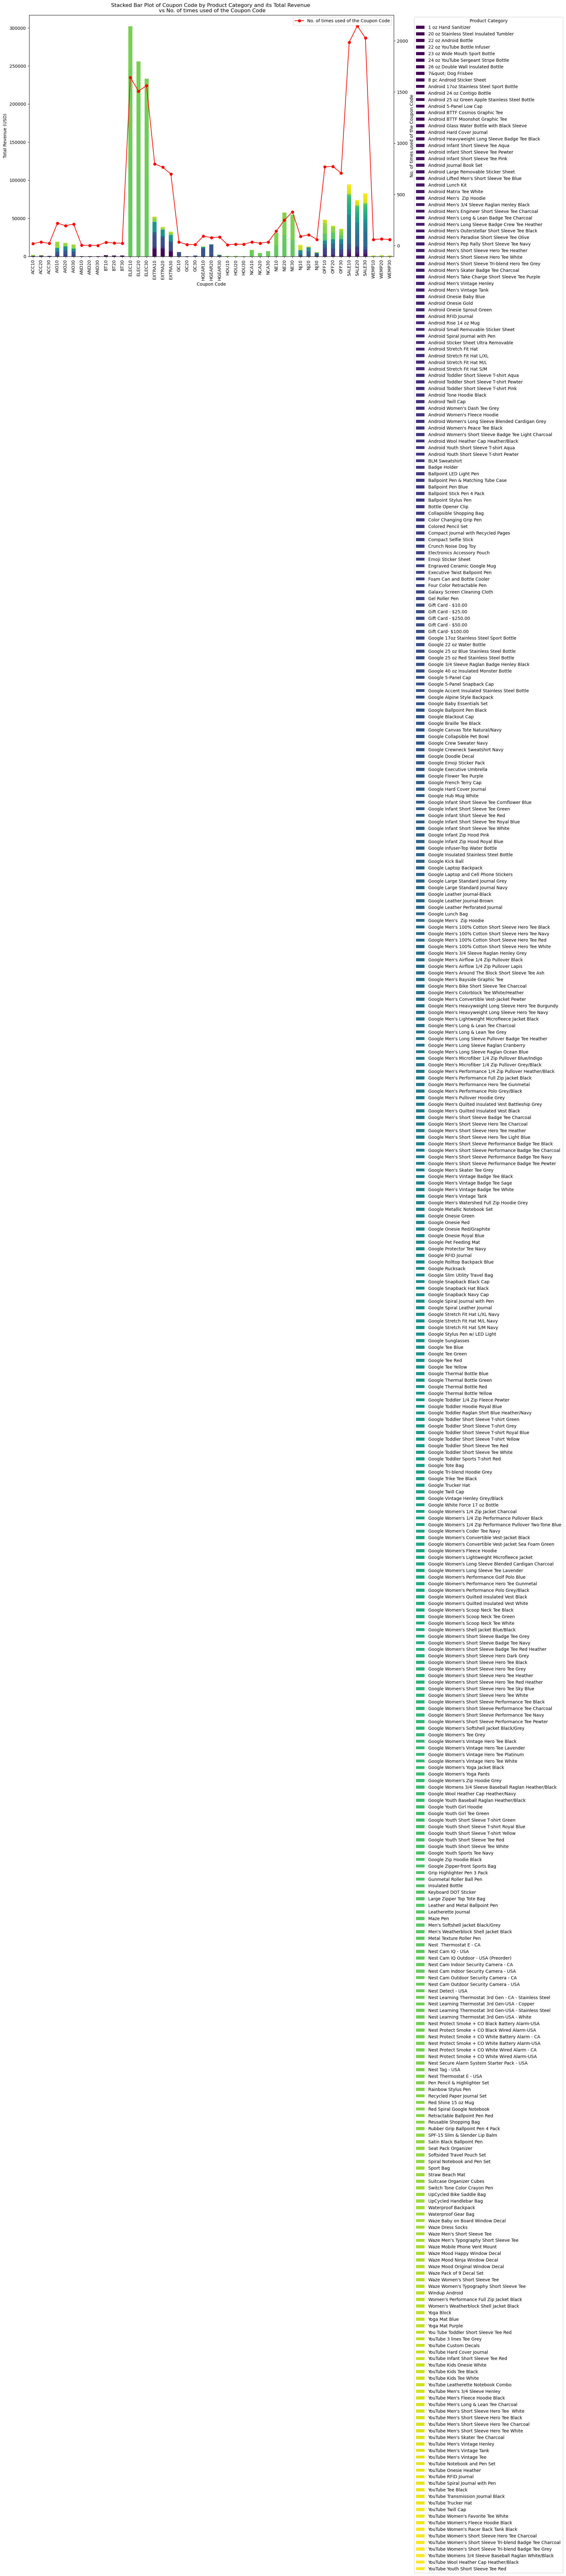

In [277]:
used_coupon = sales_data[sales_data['Coupon_Status'] == 'Used']
used_coupon2 = used_coupon[ ['Product_Description', 'TotalPrice', 'Coupon_Code' ] ]  
used_coupon2 = used_coupon2.groupby( ['Coupon_Code', 'Product_Description'] ).sum()
used_coupon2
# Create a pivot table for the stacked bar plot
used_coupon_pivot = used_coupon2.reset_index().pivot(index='Coupon_Code', columns='Product_Description', values='TotalPrice').fillna(0)

# Plot the stacked bar plot
fig, ax1 = plt.subplots(figsize=(15, 10))
used_coupon_pivot.plot(kind='bar', stacked=True, colormap='viridis', ax=ax1)
ax1.set_xlabel("Coupon Code")
ax1.set_ylabel("Total Revenue (USD)")
ax1.set_title("Stacked Bar Plot of Coupon Code by Product Category and its Total Revenue \n vs No. of times used of the Coupon Code")
ax1.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a secondary y-axis for the count of coupon codes
coupon_code_counts = used_coupon.groupby('Coupon_Code').size()
ax2 = ax1.twinx()
ax2.plot(coupon_code_counts.index, coupon_code_counts.values, color='red', marker='o', label='No. of times used of the Coupon Code')
ax2.set_ylabel("No. of times used of the Coupon Code")
ax2.legend(loc='upper right')

plt.show()
